<a href="https://colab.research.google.com/github/ptrermaya/titanic/blob/main/titanic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!pip3 install install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 328 kB 4.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 679 kB 66.5 MB/s 
     |████████████████████████████████| 9.9 MB 62.1 MB/s 
     |████████████████████████████████| 102 kB 64.2 MB/s 
     |████████████████████████████████| 4.7 MB 64.7 MB/s 
     |████████████████████████████████| 296 kB 84.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=128677fb86b23085ca44ec1f2194649f980a53e860b4f1c57dee3897372224e9
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

# Dataset

Dataset disimpan dalam bentuk zip pada Google Drive

In [ ]:
#https://drive.google.com/file/d/1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan/view?usp=sharing
!gdown --id 1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dzV9eYIO5Xb9Dnz5bCh4Qyen68oOOjan
To: /content/titanic.zip
100% 34.9k/34.9k [00:00<00:00, 36.1MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Load Dataset

In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import style
%matplotlib inline  

In [ ]:
#load dataset
titanic = pd.read_csv('train.csv')
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
#memunculkan 5 data teratas
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [ ]:
#memunculkan 5 data terbawah
titanic.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
#Melihat pembagian data pada kolom label yaitu 'Survived'
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Cleaning & EDA

Performing Data Cleaning and Analysis

1. memahami setiap kolom:
Data Dictionary: 
Deskripsi tiap variabel
 
Survived - Survived (1) atau died (0)

Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name - Passenger’s name

Sex - Passenger’s sex

Age - Passenger’s age

SibSp - Number of siblings/spouses aboard

Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)

Ticket - Ticket number

Cabin - Cabin

Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


2. Menganalisis kolom mana yang kira kira akan useful untuk menentukan apakah seseorang akan survived atau tidak

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
pandas_profiling.ProfileReport(titanic)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Banyak algoritma machine learning tidak dapat bekerja dengan categorical data, maka dari itu
# akan dilakukan proses untuk merubah value pada kolom 'Sex' dari bentuk categorical menjadi numerical dengan ketentuan male=1 and female=2


def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Sex"]=titanic["Sex"].apply(getNumber)

titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1      0   
2                             Heikkinen, Miss. Laina    2  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [ ]:
# Menghapus kolom ID karna tidak berpengaruh terhadap prediksi survived atau tidak
del titanic['PassengerId']
titanic

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    1   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2   
2           1       3                             Heikkinen, Miss. Laina    2   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2   
4           0       3                           Allen, Mr. William Henry    1   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    1   
887         1       1                       Graham, Miss. Margaret Edith    2   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    2   
889         1       1                              Behr, Mr. Karl Howell    1   
890         0       3                                Dooley, Mr. Patrick    1   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1      0         A/5 21171   7.2500   NaN        S  
1    38.0      1      0          PC 17599  71.2833   C85        C  
2    26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    35.0      1      0            113803  53.1000  C123        S  
4    35.0      0      0            373450   8.0500   NaN        S  
..    ...    ...    ...               ...      ...   ...      ...  
886  27.0      0      0            211536  13.0000   NaN        S  
887  19.0      0      0            112053  30.0000   B42        S  
888   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889  26.0      0      0            111369  30.0000  C148        C  
890  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

#### Visualisasi Data perbandingan Antara Pria dan Wanita yg selamat maupun tidak selamat

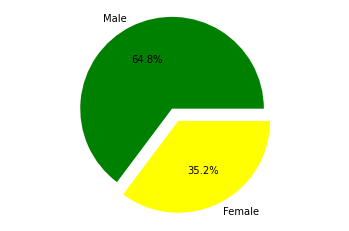

In [ ]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
# print(males)
# print(females)
p = [males, females]
plt.pie(p,    #giving array
        autopct='%1.1f%%',
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

Penumpang dengan jenis kelamin laki-laki lebih banyak daripada perempuan yaitu dengan perbandingan 64.9% : 35.1% 

In [ ]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
233
81


In [ ]:
MaleS=titanic[titanic['Sex']==1][titanic['Survived']==1].shape[0]

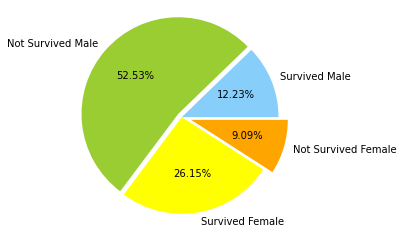

In [ ]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode, autopct="%.2f%%")
plt.axis("equal")
plt.show()

- Jumlah penumpang yang tidak selamat paling banyak dengan jenis kelamin laki-laki
- Dan sebaliknya, jumlah penumpang yang selamat paling banyak dengan jenis kelamin perempuan

#### Visualisasi penumpang berdasarkan Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

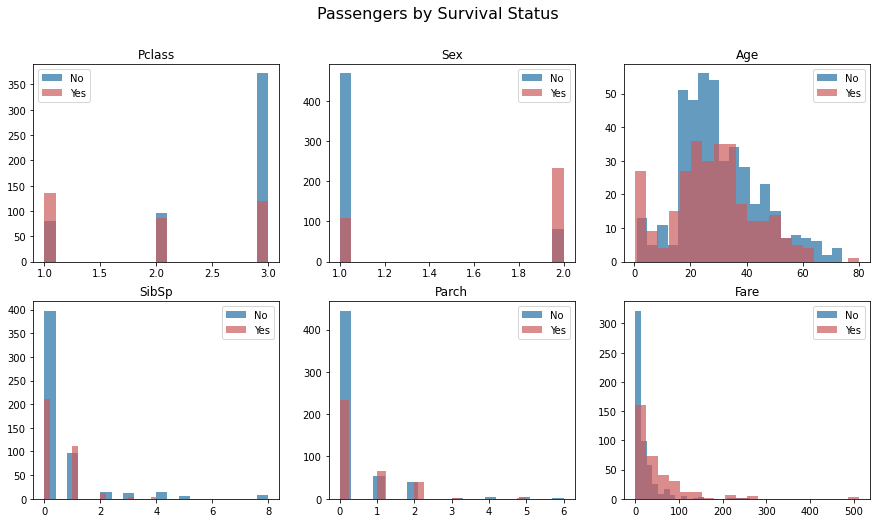

In [ ]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
flag = 0

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15,8)) #tight_layout=True
for i in range(2):
    for j in range(3):
        x1 = titanic[titanic['Survived']==0][cols[flag]].values
        x2 = titanic[titanic['Survived']==1][cols[flag]].values
        axs[i,j].hist(x1, bins=20, color='#2471A3', alpha=0.7, label='No')
        axs[i,j].hist(x2, bins=20, color='indianred', alpha=0.7, label='Yes')
        axs[i,j].set_title(str(cols[flag]))
        axs[i,j].legend()
        flag+=1

fig.suptitle('Passengers by Survival Status', fontsize=16)
plt.show()

- Pclass - dapat dilihat bahwa penumpang Kelas Satu yang selamat lebih tinggi daripada kelas dua dan tiga. Sedangkan penumpang yang tidak selamat paling banyak dari kelas tiga
- Age - dapat dilihat bahwa anak-anak lebih banyak yang selamat daripada yang tidak selamat.
- SibSp dan Parch - Jumlah anggota keluarga bisa meningkatkan kemungkinan untuk selamat.
- Fare - Tarif yang lebih tinggi berarti tingkat keselamatan yang tinggi, dimana tarif bisa menjadi faktor menentukan kelas.

### cleaning

In [ ]:
#Kolom nama tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, 
#jadi bisa ;angsung mendeletenya

del titanic["Name"]
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    1  22.0      1      0         A/5 21171   7.2500   NaN   
1         1       1    2  38.0      1      0          PC 17599  71.2833   C85   
2         1       3    2  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3         1       1    2  35.0      1      0            113803  53.1000  C123   
4         0       3    1  35.0      0      0            373450   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [ ]:
#Begitu juga jenis tiket, Kolom tiket tidak akan pernah bisa menentukan apakah seseorang akan survived atau tidak, 
#jadi bisa langsung mendeletenya

del titanic["Ticket"]
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    1  22.0      1      0   7.2500   NaN        S
1         1       1    2  38.0      1      0  71.2833   C85        C
2         1       3    2  26.0      0      0   7.9250   NaN        S
3         1       1    2  35.0      1      0  53.1000  C123        S
4         0       3    1  35.0      0      0   8.0500   NaN        S

In [ ]:
del titanic['Embarked']
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin
0         0       3    1  22.0      1      0   7.2500   NaN
1         1       1    2  38.0      1      0  71.2833   C85
2         1       3    2  26.0      0      0   7.9250   NaN
3         1       1    2  35.0      1      0  53.1000  C123
4         0       3    1  35.0      0      0   8.0500   NaN

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
#Melihat jumlah data null
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [ ]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

total_missing  perc_missing
Survived              0      0.000000
Pclass                0      0.000000
Sex                   0      0.000000
Age                 177     19.865320
SibSp                 0      0.000000
Parch                 0      0.000000
Fare                  0      0.000000
Cabin               687     77.104377

In [ ]:
#Dengan melihat presentasi jumlah missing value tiap kolom, kita dapat melihat kalau jumlah missing value dalam kolom 'Cabin'
#sangat besar sekali, bahkan sampai 77%, dengan begini kita bisa mengatakan kalau kolom 'Cabin' tidak punya pengaruh banyak
#dalam menentukan apakah seseorang akan survived atau tidak

del titanic['Cabin']
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    2  38.0      1      0  71.2833
2         1       3    2  26.0      0      0   7.9250
3         1       1    2  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [ ]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

total_missing  perc_missing
Survived              0       0.00000
Pclass                0       0.00000
Sex                   0       0.00000
Age                 177      19.86532
SibSp                 0       0.00000
Parch                 0       0.00000
Fare                  0       0.00000

Diatas bisa dilihat ada 2 kolom yang mempunyai missing value, yaitu kolom 'Age' dan 'Embarked'. Selanjutnya akan dilakukan proses untuk menghandle kolom 'Age' terlebih dahulu, dimana kolom tersebut akan diisi menggunakan nilai Mean dengan melihat kelas survivednya. Dimana jika ada di data kelas 0 maka akan mengisinya dengan mean 'Age' kelas 0, dan jika data ada di kelas 1 maka akan diisi menggunakan mean 'Age' kelas 1

In [ ]:
'''untuk mengisi nilai yang kosong, itu bisa menggunakan mean / rata-rata (kalo data yang dimasukan itu berupa numerik)
dan median / nilai tengah (kalo data yang dimasukan berupa kategorik)'''
# mencari nilai mean kolom 'Age' untuk kelas 1
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

In [ ]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 1 dengan menggunakan mean 'Age' kelas 1
titanic["Age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    2  38.0      1      0  71.2833
2         1       3    2  26.0      0      0   7.9250
3         1       1    2  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [ ]:
# mencari nilai mean kolom 'Age' untuk kelas 0

meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [ ]:
# mengisi missing value pada kolom 'Age' untuk yang kelas 0 dengan menggunakan mean 'Age' kelas 0

titanic.Age.fillna(meanNS,inplace=True)
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    2  38.0      1      0  71.2833
2         1       3    2  26.0      0      0   7.9250
3         1       1    2  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [ ]:
# Disini bisa dilihat kalau setelah dilakukan proses diatas, maka tidak ada missing values pada kolom 'Age'

titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

total_missing  perc_missing
Survived              0           0.0
Pclass                0           0.0
Sex                   0           0.0
Age                   0           0.0
SibSp                 0           0.0
Parch                 0           0.0
Fare                  0           0.0

In [ ]:
titanic["family_size"]=titanic["SibSp"]+titanic["Parch"]+1
titanic = titanic.drop(["SibSp","Parch"],axis=1)
titanic

Survived  Pclass  Sex        Age     Fare  family_size
0           0       3    1  22.000000   7.2500            2
1           1       1    2  38.000000  71.2833            2
2           1       3    2  26.000000   7.9250            1
3           1       1    2  35.000000  53.1000            2
4           0       3    1  35.000000   8.0500            1
..        ...     ...  ...        ...      ...          ...
886         0       2    1  27.000000  13.0000            1
887         1       1    2  19.000000  30.0000            1
888         0       3    2  30.626179  23.4500            4
889         1       1    1  26.000000  30.0000            1
890         0       3    1  32.000000   7.7500            1

[891 rows x 6 columns]

# Modeling & Evaluation

In [ ]:
# import library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
#Define Variable
x = titanic.drop(['Survived'], axis=1).values
y = titanic['Survived'].values

In [ ]:
#Split train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123) #Train:Test (80:20)

In [ ]:
#List model
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'SupportVectorMachine' : SVC(),
    'NaiveBayes' : GaussianNB()
}

In [ ]:
# Dictonary to hold models and it's metrics
dict_ensemble_methods_f1= {}
dict_ensemble_methods_acc = {}
dict_ensemble_methods_model = {}

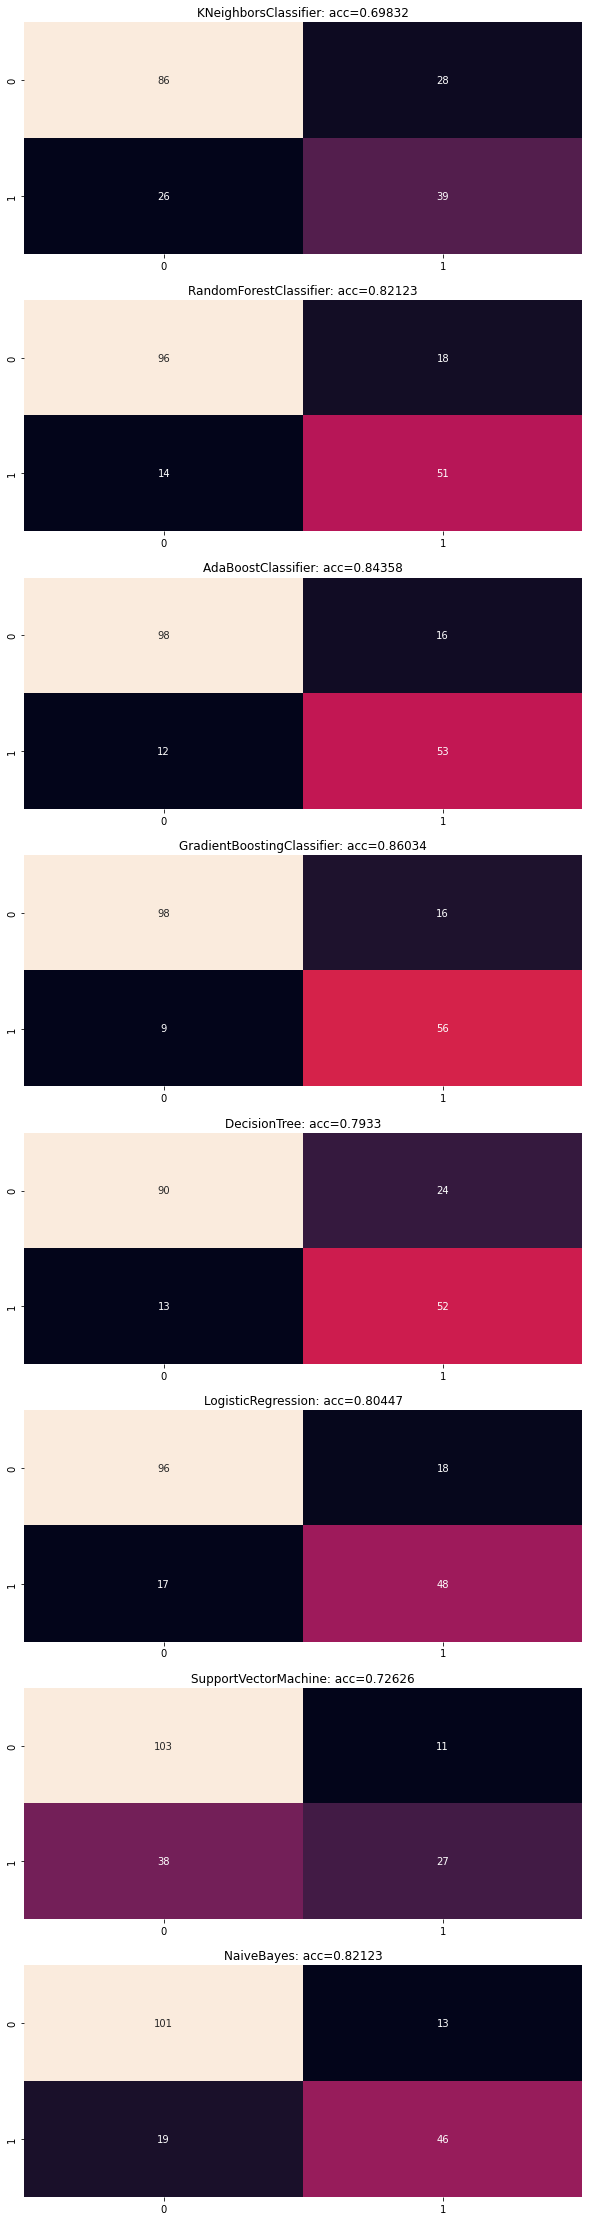

In [ ]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict, f1-score, and acc
    model = models[model_name]
    model.fit(
        x_train, 
        y_train
    )
    res=model.predict(x_test)
    f1=f1_score(y_test, res, average='micro')
    acc=accuracy_score(y_test, res)

    # Load the result into the created dict
    dict_ensemble_methods_f1[model_name]=f1
    dict_ensemble_methods_acc[model_name]=acc
    dict_ensemble_methods_model[model_name]=model
    
    cm=confusion_matrix(y_test, res)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

In [ ]:
#Data frame accuracy dan f1-score
dct = {'Accuracy':dict_ensemble_methods_acc, 'F1-Score':dict_ensemble_methods_f1}
model_df = pd.DataFrame(dct).sort_values(ascending = False , by = 'Accuracy')
model_df 

Accuracy  F1-Score
GradientBoostingClassifier  0.860335  0.860335
AdaBoostClassifier          0.843575  0.843575
RandomForestClassifier      0.821229  0.821229
NaiveBayes                  0.821229  0.821229
LogisticRegression          0.804469  0.804469
DecisionTree                0.793296  0.793296
SupportVectorMachine        0.726257  0.726257
KNeighborsClassifier        0.698324  0.698324

Akurasi dan F1-Score tertinggi adalah Gradient Boosting

In [ ]:
best_model=dict((v, k) for k, v in dict_ensemble_methods_acc.items()).get(max(dict_ensemble_methods_acc.values()))
y_prediksi=dict_ensemble_methods_model[best_model].predict(x_test)

In [ ]:
print(classification_report(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.78      0.86      0.82        65

    accuracy                           0.86       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.87      0.86      0.86       179



Tuning Parameter

In [ ]:
dict_ensemble_methods_model[best_model].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {'n_estimators': [100,250,500,750,1000],
              'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001] 
             }
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = dict_ensemble_methods_model[best_model], param_grid = param_grid, cv = 5, verbose=2, n_jobs=4)

In [ ]:
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'learning_rate': 0.01, 'n_estimators': 750}, 0.8511375947995667)

In [ ]:
param_grid = {'max_depth': [2,3,4,5,6,7], 
              'min_samples_split': [2,4,6,8,10,20,40,60,100]
             }
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01,n_estimators=750), param_grid = param_grid, cv = 5, verbose=2, n_jobs=4)

In [ ]:
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


({'max_depth': 5, 'min_samples_split': 100}, 0.8539150989855215)

In [ ]:
param_grid = {'min_samples_leaf': [1,2,3,5,7,9],
              'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01,n_estimators=750, max_depth=5, min_samples_split=100),
                    param_grid = param_grid, cv = 5, verbose=2, n_jobs=4)

In [ ]:
grid.fit(x_train, y_train)
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


({'min_samples_leaf': 3, 'subsample': 0.95}, 0.8581404510981976)

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=750, max_depth=5,
                                   min_samples_leaf=3, min_samples_split=100,
                                   subsample=0.95)

# fit the model to the training set
model.fit(x_train, y_train)

# Predict on the test set results
y_pred = model.predict(x_test)

# Check accuracy score 
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8771


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       114
           1       0.81      0.86      0.84        65

    accuracy                           0.88       179
   macro avg       0.86      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



### Feature Importance

In [ ]:
imp=dict_ensemble_methods_model[best_model].feature_importances_
imp

array([0.14080391, 0.42596011, 0.26896896, 0.09404069, 0.07022632])

In [ ]:
feature = titanic.drop(['Survived'], axis=1)
feature_names = feature.columns
feature_names

Index(['Pclass', 'Sex', 'Age', 'Fare', 'family_size'], dtype='object')

<BarContainer object of 5 artists>

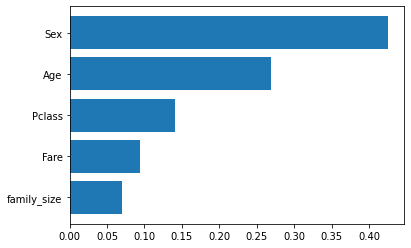

In [ ]:
sorted_idx = imp.argsort()
plt.barh(feature_names[sorted_idx], imp[sorted_idx])

Faktor yang paling menentukan seseorang survived atau tidak adalah jenis kelamin penumpang (Sex). Hal tersebut bisa disebabkan karna prioritas yang akan diselamatkan terlebih dahulu adalah perempuan.

# Predict

Dilakukan prediksi dengan data test

In [ ]:
#load data
test = pd.read_csv('test.csv')
test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [ ]:
#save fitur id
id=test['PassengerId']

In [ ]:
#cleaning data test
test_df=test
test_df.drop(columns=['Name', 'Ticket','Cabin','PassengerId','Embarked'], inplace=True)
test_df['Sex'].replace({'male': 1, 'female': 2}, inplace=True)
test_df["family_size"]=test_df["SibSp"]+test_df["Parch"]+1
test_df=test_df.drop(["SibSp","Parch"],axis=1)
test_df

Pclass  Sex   Age      Fare  family_size
0         3    1  34.5    7.8292            1
1         3    2  47.0    7.0000            2
2         2    1  62.0    9.6875            1
3         3    1  27.0    8.6625            1
4         3    2  22.0   12.2875            3
..      ...  ...   ...       ...          ...
413       3    1   NaN    8.0500            1
414       1    2  39.0  108.9000            1
415       3    1  38.5    7.2500            1
416       3    1   NaN    8.0500            1
417       3    1   NaN   22.3583            3

[418 rows x 5 columns]

Mengatasi missing value pada data test dengan nilai mean

In [ ]:
meanS= test_df.Age.mean()
test_df.Age.fillna(meanNS,inplace=True)

In [ ]:
meanS= test_df.Fare.mean()
test_df.Fare.fillna(meanNS,inplace=True)
test_df.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
family_size    0
dtype: int64

In [ ]:
#prediksi
res=y_prediksi=model.predict(test_df)
res

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#membuat data frame untuk final result
res_df=pd.DataFrame()
res_df['PassengerId']=id
res_df['Survived']=list(res)
res_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1